In [45]:
import psutil
p = psutil.Process()
p.cpu_affinity([0])
import os 
os.environ["CUDA_VISIBLE_DEVICES"] = "3"
os.environ["XLA_PYTHON_CLIENT_MEM_FRACTION"] = "0.10"
from jimgw.jim import Jim
from jimgw.single_event.detector import H1, L1, V1
from jimgw.single_event.likelihood import HeterodynedTransientLikelihoodFD
from jimgw.single_event.waveform import RippleIMRPhenomD_NRTidalv2, RippleIMRPhenomD_NRTidalv2_no_taper
from jimgw.prior import Uniform, PowerLaw, Composite 
import jax.numpy as jnp
import jax
import time
import numpy as np
jax.config.update("jax_enable_x64", True)
import shutil
import numpy as np
import matplotlib.pyplot as plt
import optax 
import sys
sys.path.append("../")
import utils_plotting as utils
print(jax.devices())



[cuda(id=0)]


In [46]:
def get_body(x, y):
    yp = 1.2 * y
    idx = np.where(x < yp)[0][-1]
    output = 1. - 1./(jnp.exp((yp - y)/(x - y) + (yp - y)/(x - yp)) + 1.)
    final_value = output.at[idx].get()
    return output

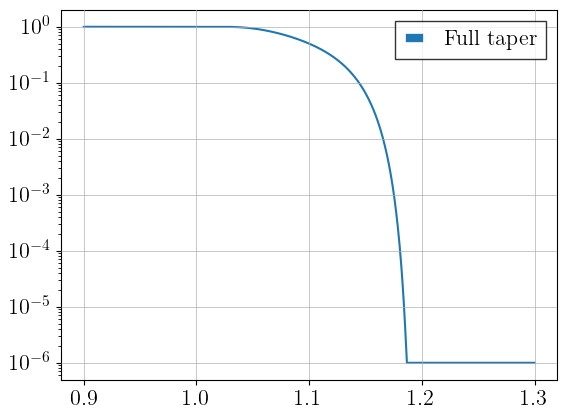

In [47]:
from ripple.waveforms.utils_tidal import get_planck_taper

y = 1.0 # let's say we terminate here
yp = 1.2 * y

x = np.linspace(0.9, 1.3, 1_000)

idx = np.where(x < yp)[0][-1] # Where does the taper stop

b = get_body(x, y)
taper = get_planck_taper(x, y)

plt.plot(x, taper, label="Full taper") 
# plt.plot(x, b, label="Body") 
plt.yscale('log')
plt.legend()
plt.show()

Zoom in

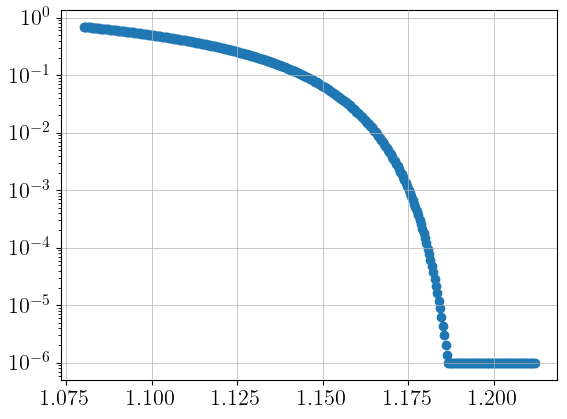

In [48]:
# mask = (x > 0.99 * y) & (x < 1.01 * yp)
mask = (x > 0.90 * yp) & (x < 1.01 * yp)
plt.plot(x[mask], taper[mask], "o")
plt.yscale('log')
plt.show()